In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from yellowbrick.features import Rank2D
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5 import show_prediction
import lime.lime_tabular
import shap

wine_data = datasets.load_wine()
df_wine = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
df_wine['target'] = pd.Series(wine_data.target)
df_wine

/home/tomas/anaconda3/envs/EXPL/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/tomas/anaconda3/envs/EXPL/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [2]:
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

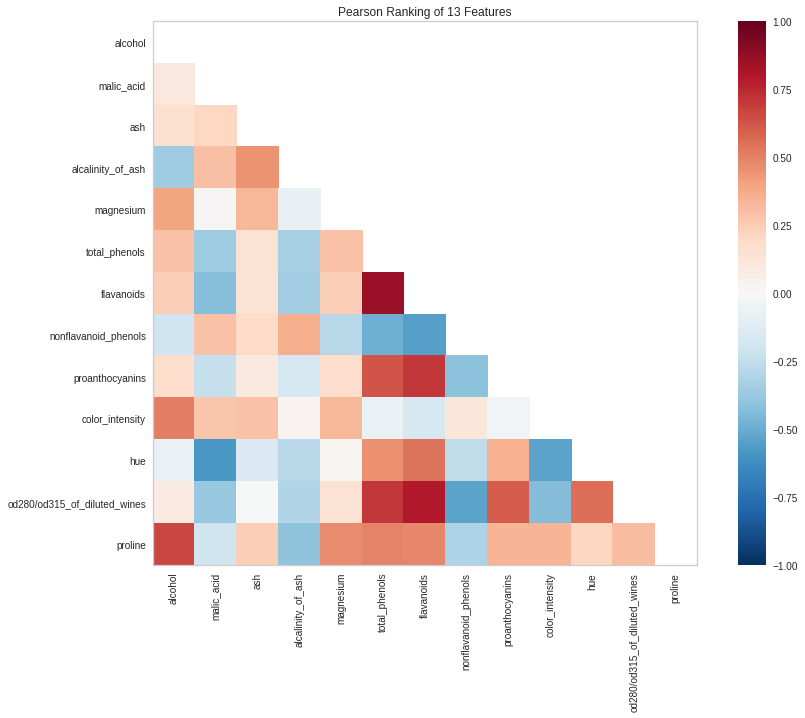

<AxesSubplot:title={'center':'Pearson Ranking of 13 Features'}>

In [3]:
visualizer = Rank2D(algorithm="pearson",  size=(1080, 720))
visualizer.fit_transform(X_train)
visualizer.poof()


From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.


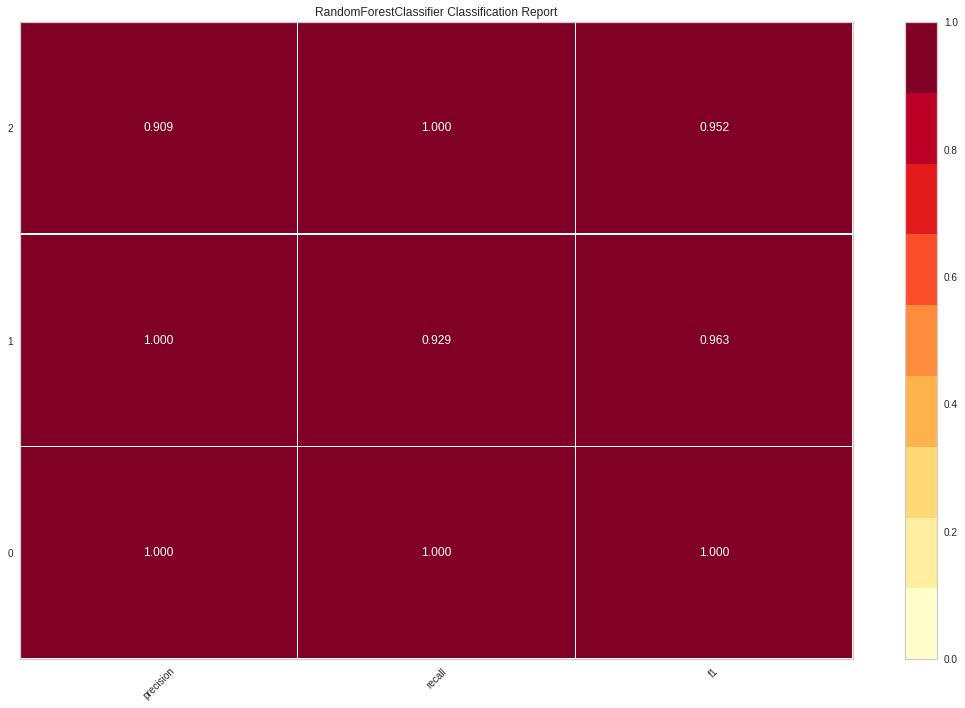

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [4]:
model = RandomForestClassifier()
visualizer = ClassificationReport(model, size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


In [5]:
eli5.show_weights(model, feature_names = X.columns.tolist())

In [29]:
show_prediction(model, X_test.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

In [7]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,                                            
                 feature_names=X_train.columns.values.tolist(),                                        
                 class_names=y_train.unique())

In [8]:
predict_fn = lambda x: model.predict_proba(x).astype(float)

In [9]:
exp = explainer.explain_instance(X_test.values[0], predict_fn, num_features=6)
exp.show_in_notebook(show_all=False)


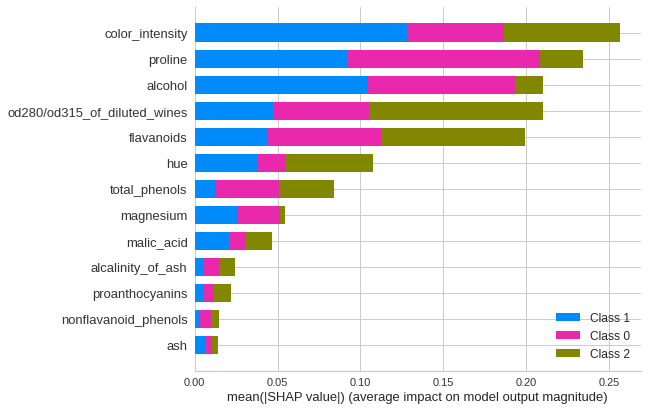

In [10]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

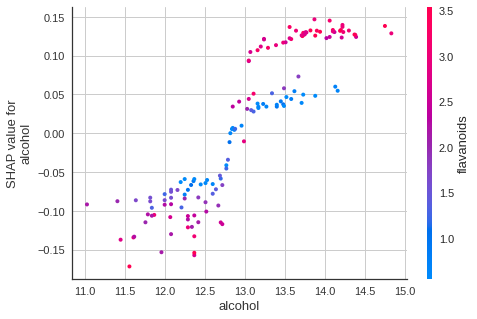

In [11]:
shap.dependence_plot("alcohol", shap_values[0], X_train)

In [32]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
S = X_output.iloc[0]
S

alcohol                          13.05
malic_acid                        2.05
ash                               3.22
alcalinity_of_ash                25.00
magnesium                       124.00
total_phenols                     2.63
flavanoids                        2.68
nonflavanoid_phenols              0.47
proanthocyanins                   1.92
color_intensity                   3.58
hue                               1.13
od280/od315_of_diluted_wines      3.20
proline                         830.00
predict                           0.00
Name: 25, dtype: float64

In [38]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

explainerModel = shap.TreeExplainer(model)
shap_values_Model = explainerModel.shap_values(S)

shap.force_plot(explainerModel.expected_value[0], shap_values[0])
